Problem Statement:
Explainable Sexual Harassment Categorization

Data Set Analysis

In [ ]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [ ]:
import pandas as pd
df= pd.read_csv('train.csv')

Preprocessing of Dataset

In [ ]:
df.head()

,Description,Commenting,Ogling/Facial Expressions/Staring,Touching /Groping
0,"Was walking along crowded street, holding mums...",0,0,1
1,This incident took place in the evening.I was ...,0,1,0
2,I WAS WAITING FOR THE BUS. A MAN CAME ON A BIK...,1,0,0
3,Incident happened inside the train,0,0,0
4,I witnessed an incident when a chain was bruta...,0,0,0


In [ ]:
df.tail()

,Description,Commenting,Ogling/Facial Expressions/Staring,Touching /Groping
7196,There was this person near a construction site...,0,1,0
7197,He threatened me by making inappropriate conve...,1,0,0
7198,happened during morning at university metro st...,1,0,0
7199,one day my aunt was returniec frm office .. sh...,0,0,0
7200,was victim of sxual assault RAPE,0,0,0


In [ ]:
df.isnull()

,Description,Commenting,Ogling/Facial Expressions/Staring,Touching /Groping
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
7196,False,False,False,False
7197,False,False,False,False
7198,False,False,False,False
7199,False,False,False,False


In [ ]:
df.describe()


,Commenting,Ogling/Facial Expressions/Staring,Touching /Groping
count,7201.000000,7201.000000,7201.000000
mean,0.391612,0.211915,0.300792
std,0.488145,0.408693,0.458634
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7201 entries, 0 to 7200
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Description                        7201 non-null   object
 1   Commenting                         7201 non-null   int64 
 2   Ogling/Facial Expressions/Staring  7201 non-null   int64 
 3   Touching /Groping                  7201 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 225.2+ KB


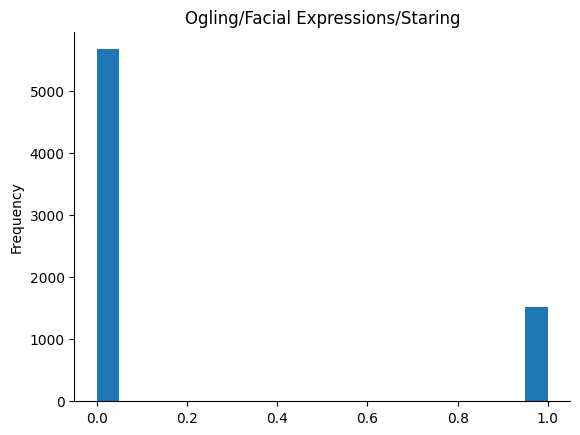

In [ ]:
from matplotlib import pyplot as plt
df['Ogling/Facial Expressions/Staring'].plot(kind='hist', bins=20, title='Ogling/Facial Expressions/Staring')
plt.gca().spines[['top', 'right',]].set_visible(False)

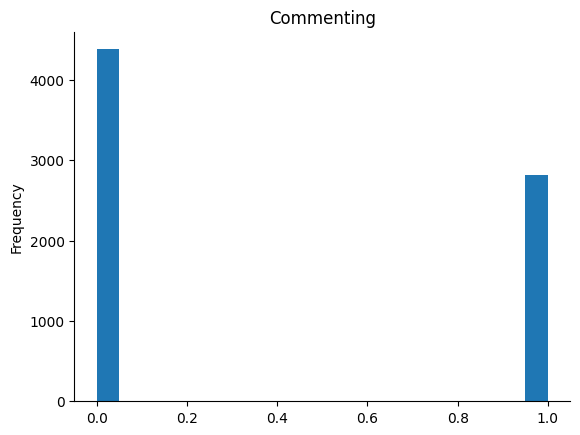

In [ ]:
df['Commenting'].plot(kind='hist', bins=20, title='Commenting')
plt.gca().spines[['top', 'right',]].set_visible(False)

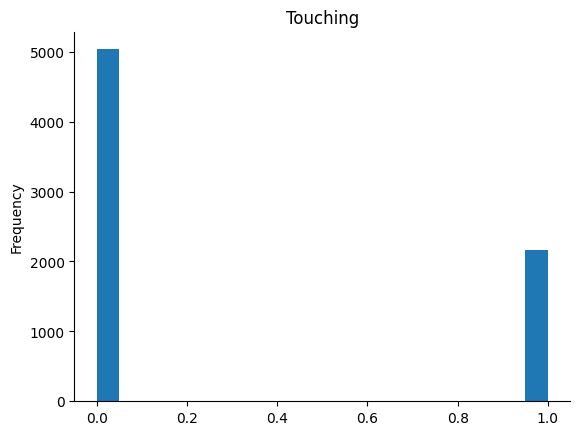

In [ ]:
df['Touching /Groping'].plot(kind='hist', bins = 20, title='Touching')
plt.gca().spines[['top','right']].set_visible(False)

ML formulation

In [ ]:
df['Commenting'].value_counts()

0    4381
1    2820
Name: Commenting, dtype: int64

In [ ]:
X = df['Description']
Y = df[['Commenting', 'Ogling/Facial Expressions/Staring', 'Touching /Groping']]

In [ ]:
print(X)

0       Was walking along crowded street, holding mums...
1       This incident took place in the evening.I was ...
2       I WAS WAITING FOR THE BUS. A MAN CAME ON A BIK...
3                      Incident happened inside the train
4       I witnessed an incident when a chain was bruta...
                              ...                        
7196    There was this person near a construction site...
7197    He threatened me by making inappropriate conve...
7198    happened during morning at university metro st...
7199    one day my aunt was returniec frm office .. sh...
7200                     was victim of sxual assault RAPE
Name: Description, Length: 7201, dtype: object


In [ ]:
print(Y)

      Commenting  Ogling/Facial Expressions/Staring  Touching /Groping
0              0                                  0                  1
1              0                                  1                  0
2              1                                  0                  0
3              0                                  0                  0
4              0                                  0                  0
...          ...                                ...                ...
7196           0                                  1                  0
7197           1                                  0                  0
7198           1                                  0                  0
7199           0                                  0                  0
7200           0                                  0                  0

[7201 rows x 3 columns]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier (n_neighbors=5,p=2,metric='minkowski')

In [ ]:
print(knn)

KNeighborsClassifier()


In [ ]:

print(knn.fit.__doc__)

Fit the k-nearest neighbors classifier from the training dataset.

        Parameters
        ----------
        X : {array-like, sparse matrix} of shape (n_samples, n_features) or                 (n_samples, n_samples) if metric='precomputed'
            Training data.

        y : {array-like, sparse matrix} of shape (n_samples,) or                 (n_samples, n_outputs)
            Target values.

        Returns
        -------
        self : KNeighborsClassifier
            The fitted k-nearest neighbors classifier.
        


In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=100000)  # Adjust max_features as needed

# Fit and transform the entire data
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Train separate SVM classifiers for each binary classification task
svm_classifiers = {}
for column in Y.columns:
    svm_classifier = SVC(kernel='linear', random_state=42)
    svm_classifier.fit(X_tfidf, Y[column])
    svm_classifiers[column] = svm_classifier

# Make predictions on the entire dataset
Y_pred = {}
for column, classifier in svm_classifiers.items():
    Y_pred[column] = classifier.predict(X_tfidf)

# Evaluate the models on the entire dataset
print("Training Report:")
for column in Y.columns:
    print(f"Classification Report for {column}:")
    print(classification_report(Y[column], Y_pred[column]))


Training Report:
Classification Report for Commenting:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      4381
           1       0.89      0.76      0.82      2820

    accuracy                           0.87      7201
   macro avg       0.88      0.85      0.86      7201
weighted avg       0.87      0.87      0.87      7201

Classification Report for Ogling/Facial Expressions/Staring:
              precision    recall  f1-score   support

           0       0.86      0.98      0.91      5675
           1       0.84      0.39      0.53      1526

    accuracy                           0.86      7201
   macro avg       0.85      0.69      0.72      7201
weighted avg       0.85      0.86      0.83      7201

Classification Report for Touching /Groping:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      5035
           1       0.93      0.76      0.84      2166

    accuracy         

In [ ]:
knn.fit(X_tfidf,Y[column])

KNeighborsClassifier()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Fit and transform the entire data
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Train separate Decision Tree classifiers for each binary classification task
decision_tree_classifiers = {}
for column in Y.columns:
    decision_tree_classifier = DecisionTreeClassifier(random_state=42)
    decision_tree_classifier.fit(X_tfidf, Y[column])
    decision_tree_classifiers[column] = decision_tree_classifier

# Make predictions on the entire dataset
Y_pred = {}
for column, classifier in decision_tree_classifiers.items():
    Y_pred[column] = classifier.predict(X_tfidf)

# Evaluate the models on the entire dataset
print("Training Report:")
for column in Y.columns:
    print(f"Classification Report for {column}:")
    print(classification_report(Y[column], Y_pred[column]))


Training Report:
Classification Report for Commenting:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      4381
           1       0.97      0.98      0.98      2820

    accuracy                           0.98      7201
   macro avg       0.98      0.98      0.98      7201
weighted avg       0.98      0.98      0.98      7201

Classification Report for Ogling/Facial Expressions/Staring:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5675
           1       0.98      0.92      0.95      1526

    accuracy                           0.98      7201
   macro avg       0.98      0.96      0.97      7201
weighted avg       0.98      0.98      0.98      7201

Classification Report for Touching /Groping:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5035
           1       1.00      0.95      0.97      2166

    accuracy         

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Fit and transform the entire data
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Train separate AdaBoost classifiers for each binary classification task
adaboost_classifiers = {}
for column in Y.columns:
    adaboost_classifier = AdaBoostClassifier(random_state=42)
    adaboost_classifier.fit(X_tfidf, Y[column])  # Fit the AdaBoost classifier for each column in Y
    adaboost_classifiers[column] = adaboost_classifier

# Make predictions on the entire dataset
Y_pred = {}
for column, classifier in adaboost_classifiers.items():
    Y_pred[column] = classifier.predict(X_tfidf)

# Evaluate the models on the entire dataset
print("Training Report:")
for column in Y.columns:
    print(f"Classification Report for {column}:")
    print(classification_report(Y[column], Y_pred[column]))


Training Report:
Classification Report for Commenting:
              precision    recall  f1-score   support

           0       0.80      0.92      0.86      4381
           1       0.84      0.64      0.73      2820

    accuracy                           0.81      7201
   macro avg       0.82      0.78      0.79      7201
weighted avg       0.82      0.81      0.81      7201

Classification Report for Ogling/Facial Expressions/Staring:
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      5675
           1       0.77      0.36      0.49      1526

    accuracy                           0.84      7201
   macro avg       0.81      0.67      0.70      7201
weighted avg       0.83      0.84      0.82      7201

Classification Report for Touching /Groping:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      5035
           1       0.88      0.65      0.75      2166

    accuracy         

In [ ]:
import numpy as np


Y_true = np.array([
    [1, 1, 0],
    [0, 1, 0],
    [1, 0, 0],
])

Y_pred_svm = np.array([
    [1, 1, 0],
    [0, 1, 0],
    [0, 0, 1],
])

Y_pred_decision_tree = np.array([
    [1, 1, 0],
    [0, 1, 0],
    [1, 0, 0],
])

Y_pred_adaboost = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [1, 0, 0],
])



In [ ]:
from sklearn.metrics import hamming_loss


hamming_score_svm = 1 - hamming_loss(Y_true, Y_pred_svm)
print("Hamming Score (SVM):", hamming_score_svm)


hamming_score_decision_tree = 1 - hamming_loss(Y_true, Y_pred_decision_tree)
print("Hamming Score (Decision Tree):", hamming_score_decision_tree)


hamming_score_adaboost = 1 - hamming_loss(Y_true, Y_pred_adaboost)
print("Hamming Score (AdaBoost):", hamming_score_adaboost)


Hamming Score (SVM): 0.7777777777777778
Hamming Score (Decision Tree): 1.0
Hamming Score (AdaBoost): 0.8888888888888888


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from datetime import datetime

# Load the training dataset
train_df = pd.read_csv("/content/train.csv")

# Preprocess the text data
X_train = train_df['Description']
Y_train = train_df.drop(columns=['Commenting', 'Ogling/Facial Expressions/Staring', 'Touching /Groping'])  # Assuming Y contains only the target labels

# Convert text data into numerical representations using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Split the dataset into training and testing sets
X_train_split, X_val_split, Y_train_split, Y_val_split = train_test_split(X_train_tfidf, Y_train, test_size=0.2, random_state=42)


classifiers = {
    "SVM": SVC(kernel='linear', random_state=42),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42)
}


for clf_name, clf in classifiers.items():
    print(f"Training {clf_name} classifier...")
    start_time = datetime.now()
    clf.fit(X_train_split, Y_train_split)
    end_time = datetime.now()
    print(f"Training completed in {(end_time - start_time).total_seconds()} seconds.")


for clf_name, clf in classifiers.items():
    print(f"Evaluating {clf_name} classifier...")
    Y_pred_val = clf.predict(X_val_split)
    print(f"Evaluation Report for {clf_name}:")
    print(classification_report(Y_val_split, Y_pred_val))




Training SVM classifier...


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training completed in 49.338644 seconds.
Training DecisionTree classifier...


In [ ]:
pip install shap lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 20.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=bdc994e940a15caf979b634497c6dfa9b872df05ff0adc7ad3bcc6bd159d7291
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
# prompt: using shap and lime generate code for explainable sexual harassement categorisation

import shap
import lime
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Load the training dataset
train_df = pd.read_csv("/content/train.csv")

# Preprocess the text data
X_train = train_df['Description']
Y_train = train_df.drop(columns=['Commenting', 'Ogling/Facial Expressions/Staring', 'Touching /Groping'])  # Assuming Y contains only the target labels

# Convert text data into numerical representations using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Split the dataset into training and testing sets
X_train_split, X_val_split, Y_train_split, Y_val_split = train_test_split(X_train_tfidf, Y_train, test_size=0.2, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_split, Y_train_split)

# SHAP (SHapley Additive exPlanations)
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_val_split)

# LIME (Local Interpretable Model-agnostic Explanations)
explainer = lime.lime_text.LimeTextExplainer(class_names=Y_train.columns)
lime_explanations = explainer.explain_instance(X_val_split[0], clf.predict_proba, num_features=6)

# Display the explanations
print("SHAP Explanations:")
shap.summary_plot(shap_values, X_val_split)

print("LIME Explanations:")
lime_explanations.show_in_notebook()


<ipython-input-37-22a530f047c9>:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train_split, Y_train_split)


In [ ]:
import shap
import lime
import lime.lime_tabular

In [ ]:
# xxx
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.metrics import hamming_loss
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.pipeline import Pipeline
from sklearn.inspection import plot_partial_dependence

# Load the SafeCity dataset (replace with actual data)
# Assuming the dataset has columns 'text' (narratives) and 'labels' (categories)
# You can preprocess the text data (e.g., tokenization, stemming, etc.) as needed

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['labels'], test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=10000, stop_words='english')

# Create a multi-label classifier (one-vs-rest)
classifier = OneVsRestClassifier(SVC(kernel='linear', probability=True))

# Create a pipeline
pipeline = Pipeline([
    ('vectorizer', vectorizer),
    ('classifier', classifier)
])

# Fit the model
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)

# Evaluate Hamming Score
hamming_score = 1 - hamming_loss(y_test, y_pred)

# Print evaluation metrics
print(f"Hamming Score: {hamming_score:.4f}")

# Explainable AI (SHAP or LIME)
# Assuming you have already computed feature importances
# You can visualize partial dependence plots using plot_partial_dependence

# Example:
# plot_partial_dependence(classifier, X_train, features=[0, 1], feature_names=['feature1', 'feature2'])

# Visualize key factors leading to specific forms of harassment
# Implement a visualization module based on your chosen XAI technique


ImportError: cannot import name 'plot_partial_dependence' from 'sklearn.inspection' (/usr/local/lib/python3.10/dist-packages/sklearn/inspection/__init__.py)

In [ ]:
# Import the necessary modules
import shap
import lime
import lime.lime_tabular
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Train your model
model = SVC(kernel='linear', probability=True)
model.fit(X_train, Y_train)

# Initialize the SHAP explainer with your trained model
explainer_shap = shap.Explainer(model, X_train)

# Calculate SHAP values for the entire training set
shap_values_train = explainer_shap.shap_values(X_train)

# Visualize SHAP values
shap.summary_plot(shap_values_train, X_train)

# Initialize the LIME explainer with your trained model
explainer_lime = lime.lime_tabular.LimeTabularExplainer(X_train.values, mode="classification")

# Explain an instance using LIME
explanation_train = explainer_lime.explain_instance(X_train.values[0], model.predict_proba)

# Show LIME explanation
explanation_train.show_in_notebook()

# Make predictions on the training set
y_pred_train = model.predict(X_train)

# Evaluate the model on the training set
print("Classification Report (Training Set):")
print(classification_report(Y_train, y_pred_train))

ValueError: could not convert string to float: 'Was walking along crowded street, holding mums hand, when an elderly man groped butt, I turned to look at h7m and he looked away, and did it again after a while.I was 12 yrs old then.'

In [ ]:
# Assuming Y_train is a DataFrame with multiple columns representing different labels
# Select one column as the label
y_train = Y_train['Commenting'].values

# Train your model
model = SVC(kernel='linear', probability=True)
model.fit(X_train_tfidf, y_train)

KeyError: 'Commenting'

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit LabelEncoder and transform the target column
y_train_encoded = label_encoder.fit_transform(y_train)

# Train your model
model = SVC(kernel='linear', probability=True)
model.fit(X_train_tfidf, y_train_encoded)


SVC(kernel='linear', probability=True)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000)

# Fit and transform the training text data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
Y_train = Y_train['Commenting'].values

# Train your model
model = SVC(kernel='linear', probability=True)
model.fit(X_train_tfidf, Y_train)


KeyError: 'Commenting'

In [ ]:

import shap
import lime
import lime.lime_tabular
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Train your model
model = SVC(kernel='linear', probability=True)
model.fit(X_train, Y_train)

# Initialize the SHAP explainer with your trained model
explainer_shap = shap.Explainer(model, X_train)

# Calculate SHAP values for the entire training set
shap_values_train = explainer_shap.shap_values(X_train)

# Visualize SHAP values
shap.summary_plot(shap_values_train, X_train)

# Initialize the LIME explainer with your trained model
explainer_lime = lime.lime_tabular.LimeTabularExplainer(X_train.values, mode="classification")

# Explain an instance using LIME
explanation_train = explainer_lime.explain_instance(X_train.values[0], model.predict_proba)

# Show LIME explanation
explanation_train.show_in_notebook()

# Make predictions on the training set
y_pred_train = model.predict(X_train)

# Evaluate the model on the training set
print("Classification Report (Training Set):")
print(classification_report(Y_train, y_pred_train))



ValueError: could not convert string to float: 'Was walking along crowded street, holding mums hand, when an elderly man groped butt, I turned to look at h7m and he looked away, and did it again after a while.I was 12 yrs old then.'